In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("cardio_train.csv",sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.shape

(70000, 13)

In [0]:
df.drop(axis=1,columns=["id"],inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [6]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().any()

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [8]:
df[(df<0)==True].any()


age            False
gender         False
height         False
weight         False
ap_hi           True
ap_lo           True
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

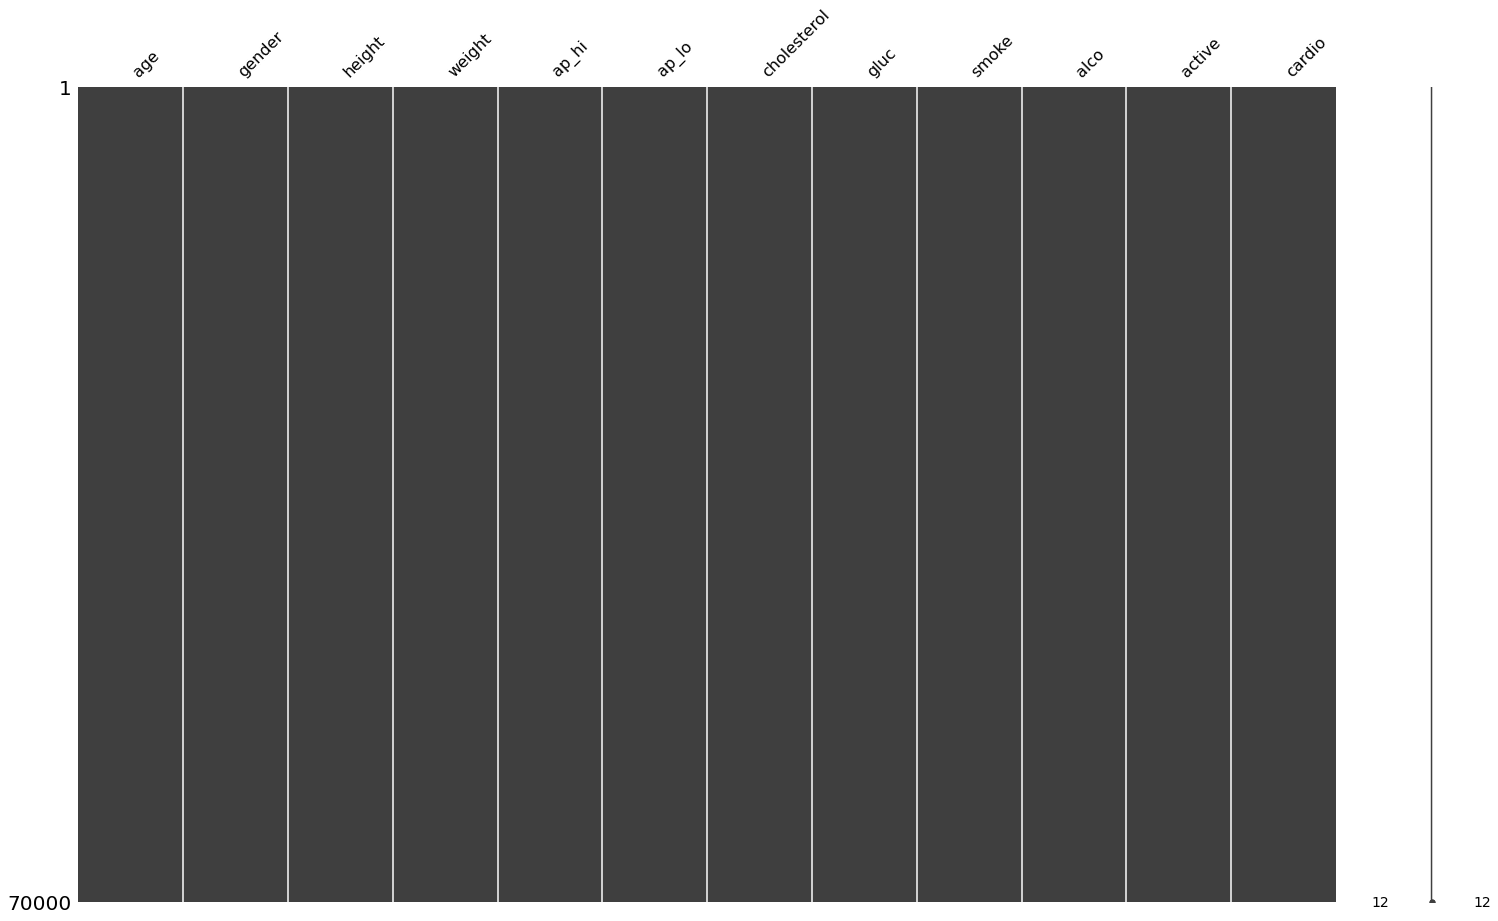

In [9]:
msn.matrix(df,figsize=(25,15))

In [0]:
# Trying to see for the outliers

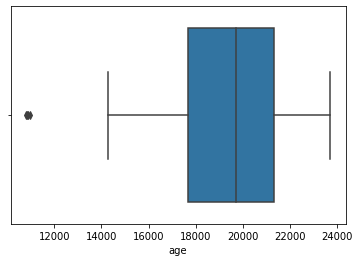

In [11]:
sns.boxplot(x=df["age"])

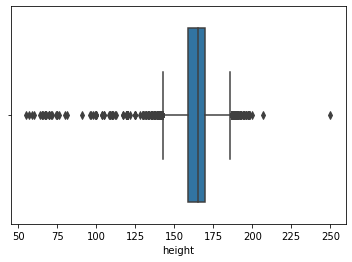

In [12]:
sns.boxplot(x=df["height"])

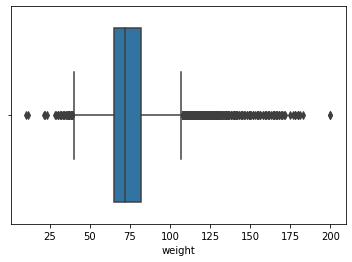

In [13]:
sns.boxplot(x=df["weight"])

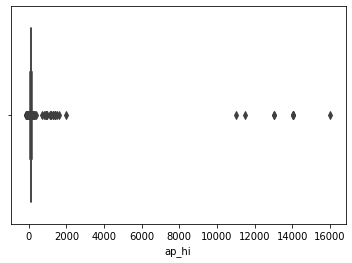

In [14]:
sns.boxplot(x=df["ap_hi"])

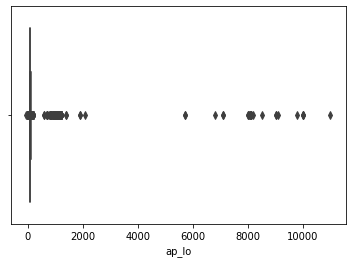

In [15]:
sns.boxplot(x=df["ap_lo"])

In [0]:
##Since we have got a lot of outliers we need to deal with it

In [0]:
from scipy import stats
z=np.abs(stats.zscore(df))

In [18]:
threshold=3
print(np.where(z>2))

(array([    1,     2,     2, ..., 69997, 69997, 69998]), array([ 6,  6, 10, ...,  9, 10, 10]))


In [0]:
df=df[(z<2).all(axis=1)]

In [20]:
len(df)

38448

In [0]:
#Lets check out for the outliers

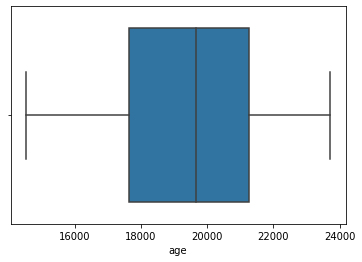

In [22]:
sns.boxplot(x=df["age"])

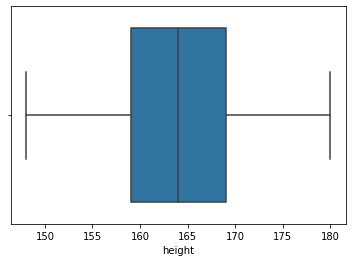

In [23]:
sns.boxplot(x=df["height"])

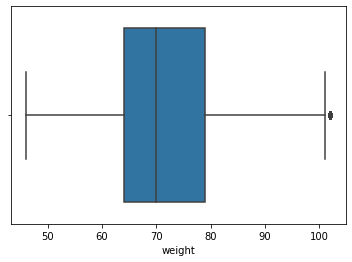

In [24]:
sns.boxplot(x=df["weight"])

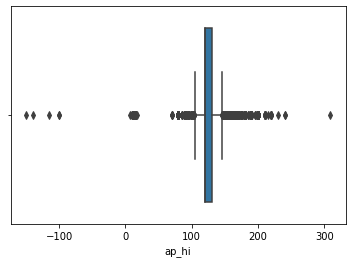

In [25]:
sns.boxplot(x=df["ap_hi"])

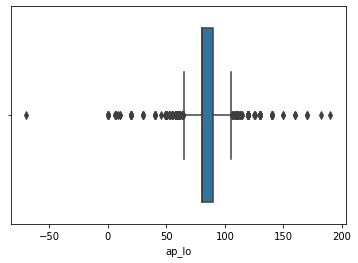

In [26]:
sns.boxplot(x=df["ap_lo"])

In [0]:
#lets eliminate the negetive's of ap_hi and ap_lo

In [28]:
df[df["ap_hi"]<0]


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4607,15281,1,165,78.0,-100,80,2,1,0,0,1,0
16021,22108,2,161,90.0,-115,70,1,1,0,0,1,0
20536,15581,1,153,54.0,-100,70,1,1,0,0,1,0
23988,18301,1,162,74.0,-140,90,1,1,0,0,1,1
35040,23325,2,168,59.0,-150,80,1,1,0,0,1,1


In [0]:
df=df.drop([4607,16021,20536,23988,35040])

In [30]:
df[df["ap_hi"]<0]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [31]:
df[df["ap_lo"]<0]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
60106,22571,1,167,74.0,15,-70,1,1,0,0,1,1


In [0]:
df=df.drop([60106])

In [33]:
df[df["ap_lo"]<0]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [0]:
#Lets now try and scale the dataset

In [0]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()


In [0]:
y=df.iloc[:,-1:].values

In [0]:
df=df.drop(["cardio"],axis=1)

In [38]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1
8,17668,1,158,71.0,110,70,1,1,0,0,1
10,22530,1,169,80.0,120,80,1,1,0,0,1
11,18815,2,173,60.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
69991,20609,1,159,72.0,130,90,2,2,0,0,1
69992,18792,1,161,56.0,170,90,1,1,0,0,1
69993,19699,1,172,70.0,130,90,1,1,0,0,1
69994,21074,1,165,80.0,150,80,1,1,0,0,1


In [0]:
df=std.fit_transform(df)

In [0]:
#Now see the columns which are important

In [0]:
df=pd.DataFrame(df)

In [42]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.006737,-0.056881,0.062791,0.195173,0.152116,0.043590,0.025433,NaN,NaN,NaN
1,0.006737,1.000000,0.476669,0.141515,0.062705,0.063231,-0.037697,-0.012913,NaN,NaN,NaN
2,-0.056881,0.476669,1.000000,0.282507,0.010742,0.018701,-0.057949,-0.029476,NaN,NaN,NaN
3,0.062791,0.141515,0.282507,1.000000,0.223007,0.219998,0.075769,0.077131,NaN,NaN,NaN
4,0.195173,0.062705,0.010742,0.223007,1.000000,0.647521,0.117636,0.069847,NaN,NaN,NaN
5,0.152116,0.063231,0.018701,0.219998,0.647521,1.000000,0.092283,0.059375,NaN,NaN,NaN
6,0.043590,-0.037697,-0.057949,0.075769,0.117636,0.092283,1.000000,0.298383,NaN,NaN,NaN
7,0.025433,-0.012913,-0.029476,0.077131,0.069847,0.059375,0.298383,1.000000,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


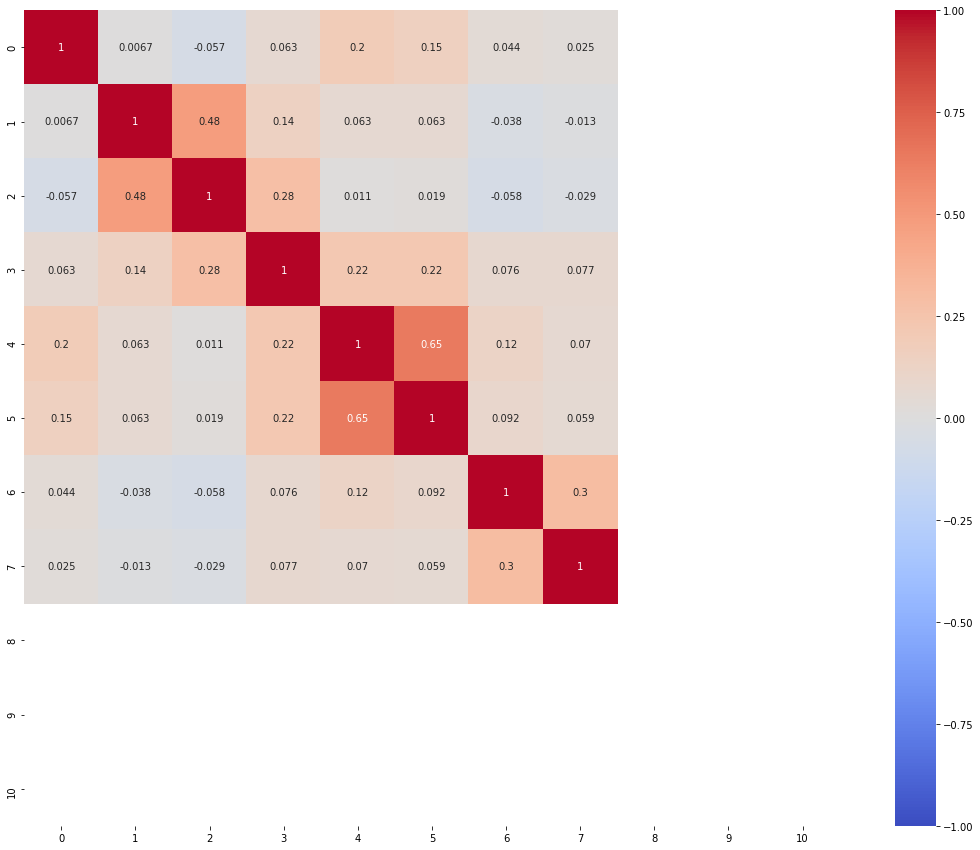

In [43]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,center=0,cmap="coolwarm",square=True)

In [0]:
#Now droping the column of cholesterol

In [0]:
df=df.drop([6],axis=1)

In [0]:
#Now lets check the output variable Distribution

In [0]:
import plotly.graph_objs as go
import plotly.offline as py

In [0]:
Y=pd.DataFrame(y)

In [49]:
Y[0].value_counts()

0    21171
1    17271
Name: 0, dtype: int64

In [0]:
#Quite distributed.... nice

In [0]:
#Now lets go for training..... and before that train test split

In [0]:
x=df.iloc[:,:].values


In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [0]:
#Now applying Classification Algorithms

## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred=lr.predict(x_test)

In [57]:
metrics.confusion_matrix(y_test,pred)

array([[3596,  708],
       [1400, 1985]])

In [58]:
acc=metrics.accuracy_score(y_test,pred)
rec=metrics.recall_score(y_test,pred)
print("Accuracy:"+str(acc)+" Recall:"+str(rec))

Accuracy:0.7258421121082065 Recall:0.5864106351550961


## Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pred=dtc.predict(x_test)

In [61]:
metrics.confusion_matrix(y_test,pred)

array([[2880, 1424],
       [1417, 1968]])

In [62]:
acc=metrics.accuracy_score(y_test,pred)
rec=metrics.recall_score(y_test,pred)
print("Accuracy:"+str(acc)+" Recall:"+str(rec))

Accuracy:0.6305111197815061 Recall:0.5813884785819793


### Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
rdm=RandomForestClassifier(random_state=42,n_estimators=1000)
rdm.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
pred=rdm.predict(x_test)

In [65]:
metrics.confusion_matrix(y_test,pred)

array([[3258, 1046],
       [1277, 2108]])

In [66]:
acc=metrics.accuracy_score(y_test,pred)
rec=metrics.recall_score(y_test,pred)
print("Accuracy:"+str(acc)+" Recall:"+str(rec))

Accuracy:0.6978800884380284 Recall:0.6227474150664697


### K-Nearest Neighbour

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
pred=knn.predict(x_test)

In [69]:
metrics.confusion_matrix(y_test,pred)

array([[3195, 1109],
       [1297, 2088]])

In [70]:
acc=metrics.accuracy_score(y_test,pred)
rec=metrics.recall_score(y_test,pred)
print("Accuracy:"+str(acc)+" Recall:"+str(rec))

Accuracy:0.6870854467420991 Recall:0.6168389955686854


### XGBoost

In [71]:
from xgboost.sklearn import XGBClassifier
xgb=XGBClassifier(random_state=42,n_estimators=1000)
xgb.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pred=xgb.predict(x_test)

In [73]:
metrics.confusion_matrix(y_test,pred)

array([[3559,  745],
       [1354, 2031]])

In [74]:
acc=metrics.accuracy_score(y_test,pred)
rec=metrics.recall_score(y_test,pred)
print("Accuracy:"+str(acc)+" Recall:"+str(rec))

Accuracy:0.7270126154246326 Recall:0.6


### Support Vector Machines

In [75]:
from sklearn.svm import SVC
sv=SVC(kernel="linear")
sv.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
pred=sv.predict(x_test)

In [77]:
metrics.confusion_matrix(y_test,pred)

array([[3762,  542],
       [1575, 1810]])

In [78]:
acc=metrics.accuracy_score(y_test,pred)
rec=metrics.recall_score(y_test,pred)
print("Accuracy:"+str(acc)+" Recall:"+str(rec))

Accuracy:0.7246716087917805 Recall:0.534711964549483


## Now applying Random Search CV for all the algorithms

### Logistic Regression

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [0]:
lr=LogisticRegression()

In [0]:
lr_dist={'C':np.logspace(0,4,10), 
         'dual':[False,True],
         'fit_intercept':[True,False],
          'penalty':['l2','l1'],
          'verbose':[0,1],
          'warm_start':[False,True]
    
}

In [84]:
rf_param,rf_score=hyper(lr,lr_dist,40,x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [0]:
def hyper(est,dist,num,x,y):
  rdmsearch=RandomizedSearchCV(param_distributions=dist,n_iter=num,cv=10,estimator=est)
  rdmsearch.fit(x,y)
  params=rdmsearch.best_params_
  score=rdmsearch.best_score_
  return params,score

In [86]:
print("Randamized Search cv score:"+str(rf_score))

Randamized Search cv score:0.7262055885058201


In [87]:
print("Random params:"+str(rf_param))

Random params:{'warm_start': True, 'verbose': 0, 'penalty': 'l2', 'fit_intercept': True, 'dual': False, 'C': 10000.0}


In [88]:
lr=LogisticRegression(warm_start=True,verbose=0,penalty='l2',fit_intercept=True,dual=False,C=1291.5496650148827)
lr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1291.5496650148827, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)

In [0]:
pred=lr.predict(x_test)

In [90]:
metrics.confusion_matrix(y_test,pred)

array([[3596,  708],
       [1400, 1985]])

In [91]:
acc=metrics.accuracy_score(y_test,pred)
rec=metrics.recall_score(y_test,pred)
print("Accuracy:"+str(acc)+" Recall:"+str(rec))

Accuracy:0.7258421121082065 Recall:0.5864106351550961


### Decision Tree

In [0]:
lr_dist={'ccp_alpha':np.arange(0.0,0.9,0.005),
         'criterion':['gini','entropy'],
         'max_depth':[3,2,4,5,6],
         'max_features':[3,4,5,6],
         'max_leaf_nodes':[3,4,5,6,7]
         
    
}

In [0]:
def hyper(est,dist,num,x,y):
  rdmsearch=RandomizedSearchCV(param_distributions=dist,n_iter=num,cv=10,estimator=est)
  rdmsearch.fit(x,y)
  params=rdmsearch.best_params_
  score=rdmsearch.best_score_
  return params,score

In [0]:
rf_param,rf_score=hyper(dtc,lr_dist,50,x_train,y_train)

In [103]:
print("Randamized Search cv score:"+str(rf_score))

Randamized Search cv score:0.6761266981720533


In [104]:
print("Random params:"+str(rf_param))

Random params:{'max_leaf_nodes': 3, 'max_features': 4, 'max_depth': 3, 'criterion': 'gini', 'ccp_alpha': 0.005}


In [105]:
dtc=DecisionTreeClassifier(max_leaf_nodes=5,max_features=5,max_depth=5,criterion='gini',ccp_alpha=0.065)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.065, class_weight=None, criterion='gini',
                       max_depth=5, max_features=5, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
pred=dtc.predict(x_test)

In [107]:
metrics.confusion_matrix(y_test,pred)

array([[3614,  690],
       [1392, 1993]])

In [108]:
acc=metrics.accuracy_score(y_test,pred)
rec=metrics.recall_score(y_test,pred)
print("Accuracy:"+str(acc)+" Recall:"+str(rec))

Accuracy:0.7292235661334374 Recall:0.5887740029542098


### Random Forest

In [0]:
lr_dist={'bootstrap':[True,False],
         'ccp_alpha':np.arange(0.0,0.9,0.002),
         'criterion':['gini','entropy'],
         'max_depth':[2,3,4,5,6,7],
         'max_leaf_nodes':[2,3,4,5,6,7],
         'n_estimators':[100,500,200,300],
         'oob_score':[False,True],
         'verbose':[0,1],
         'warm_start':[False,True]
    
}

In [0]:
def hyper(est,dist,num,x,y):
  rdmsearch=RandomizedSearchCV(param_distributions=dist,n_iter=num,cv=10,estimator=est,n_jobs=-1)
  rdmsearch.fit(x,y)
  params=rdmsearch.best_params_
  score=rdmsearch.best_score_
  return params,score

In [111]:
rf_param,rf_score=hyper(rdm,lr_dist,20,x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


In [112]:
print("Randamized Search cv score:"+str(rf_score))

Randamized Search cv score:0.7211002251895081


In [113]:
print("Random params:"+str(rf_param))

Random params:{'warm_start': False, 'verbose': 1, 'oob_score': True, 'n_estimators': 100, 'max_leaf_nodes': 7, 'max_depth': 6, 'criterion': 'entropy', 'ccp_alpha': 0.068, 'bootstrap': True}


In [114]:
rdm=RandomForestClassifier(warm_start=False,verbose=1,oob_score=True,n_estimators=100,max_leaf_nodes=7,max_depth=6,criterion='entropy',ccp_alpha=0.068,bootstrap=True)
rdm.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.068, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=7, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=1, warm_start=False)

In [0]:
pred=dtc.predict(x_test)

In [116]:
metrics.confusion_matrix(y_test,pred)

array([[3614,  690],
       [1392, 1993]])

In [117]:
acc=metrics.accuracy_score(y_test,pred)
rec=metrics.recall_score(y_test,pred)
print("Accuracy:"+str(acc)+" Recall:"+str(rec))

Accuracy:0.7292235661334374 Recall:0.5887740029542098


## K-Nearest Neighbour

In [0]:
lr_dist={'leaf_size':[30,10,20,40,50],
         'metric':['minkowski','euclidean','chi_square'],
         'n_neighbors':[3,5,7,8,9,11,13,15,17,19,31,33,35,37,39,41,43,45],
         'p':[2,1,3,4]
    
}

In [0]:
def hyper(est,dist,num,x,y):
  rdmsearch=RandomizedSearchCV(param_distributions=dist,n_iter=num,cv=10,estimator=est,n_jobs=-1)
  rdmsearch.fit(x,y)
  params=rdmsearch.best_params_
  score=rdmsearch.best_score_
  return params,score

In [121]:
rf_param,rf_score=hyper(knn,lr_dist,40,x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [122]:
print("Randamized Search cv score:"+str(rf_score))

Randamized Search cv score:0.7291971412561981


In [123]:
print("Random params:"+str(rf_param))

Random params:{'p': 1, 'n_neighbors': 39, 'metric': 'minkowski', 'leaf_size': 40}


In [124]:
knn=KNeighborsClassifier(p=1,n_neighbors=39,metric='minkowski',leaf_size=40)
knn.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



KNeighborsClassifier(algorithm='auto', leaf_size=40, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=39, p=1,
                     weights='uniform')

In [0]:
pred=knn.predict(x_test)

In [128]:
metrics.confusion_matrix(y_test,pred)

array([[3559,  745],
       [1411, 1974]])

In [129]:
acc=metrics.accuracy_score(y_test,pred)
rec=metrics.recall_score(y_test,pred)
print("Accuracy:"+str(acc)+" Recall:"+str(rec))

Accuracy:0.7195994277539342 Recall:0.5831610044313146


## XGBoost

In [0]:
lr_dist={'base_score':[0.5,1.0,1.5],
         'booster':['gbtree','dart'],
         'gamma':np.arange(0,250,1),
         'learning_rate':[0.1,0.01,0.5],
         'max_depth':[3,4,5,2],
         'verbosity':[1,0]
    
}

In [134]:
rf_param,rf_score=hyper(xgb,lr_dist,25,x_train,y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [135]:
print("Randamized Search cv score:"+str(rf_score))

Randamized Search cv score:0.730595430661719


In [136]:
print("Random params:"+str(rf_param))

Random params:{'verbosity': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 36, 'booster': 'gbtree', 'base_score': 0.5}


In [137]:
xgb=XGBClassifier(verbosity=1,max_depth=3,learning_rate=0.1,gamma=36,booster='gbtree',base_score=0.5)
xgb.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=36,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pred=knn.predict(x_test)

In [139]:
metrics.confusion_matrix(y_test,pred)

array([[3559,  745],
       [1411, 1974]])

In [140]:
acc=metrics.accuracy_score(y_test,pred)
rec=metrics.recall_score(y_test,pred)
print("Accuracy:"+str(acc)+" Recall:"+str(rec))

Accuracy:0.7195994277539342 Recall:0.5831610044313146


## Sapport Vector Machines

In [0]:
lr_dist={'C':[1.0],
         'degree':[3],
         'gamma':[10],
         'kernel':['rbf']
             
}

In [151]:
rf_param,rf_score=hyper(sv,lr_dist,1,x_train,y_train)

KeyboardInterrupt: ignored

In [0]:
print("Randamized Search cv score:"+str(rf_score))

In [0]:
print("Random params:"+str(rf_param))

In [157]:
sv=SVC(C=10)
sv.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
pred=sv.predict(x_test)

In [159]:
metrics.confusion_matrix(y_test,pred)

array([[3638,  666],
       [1433, 1952]])

In [160]:
acc=metrics.accuracy_score(y_test,pred)
rec=metrics.recall_score(y_test,pred)
print("Accuracy:"+str(acc)+" Recall:"+str(rec))

Accuracy:0.7270126154246326 Recall:0.5766617429837518


# ANN

In [161]:
x_train.shape

(30753, 10)

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Activation
model=Sequential()
model.add(Dense(12,input_dim=10,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [194]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
30753/30753 [==============================] - 4s 121us/step - loss: 0.6357 - accuracy: 0.6457
Epoch 2/20
30753/30753 [==============================] - 3s 114us/step - loss: 0.5794 - accuracy: 0.7286
Epoch 3/20
30753/30753 [==============================] - 4s 115us/step - loss: 0.5629 - accuracy: 0.7311
Epoch 4/20
30753/30753 [==============================] - 4s 114us/step - loss: 0.5540 - accuracy: 0.7331
Epoch 5/20
30753/30753 [==============================] - 4s 114us/step - loss: 0.5503 - accuracy: 0.7318
Epoch 6/20
30753/30753 [==============================] - 4s 115us/step - loss: 0.5484 - accuracy: 0.7332
Epoch 7/20
30753/30753 [==============================] - 3s 114us/step - loss: 0.5472 - accuracy: 0.7340
Epoch 8/20
30753/30753 [==============================] - 3s 113us/step - loss: 0.5464 - accuracy: 0.7337
Epoch 9/20
30753/30753 [==============================] - 4s 114us/step - loss: 0.5462 - accuracy: 0.7337
Epoch 10/20
30753/30753 [=====================

In [195]:
model.evaluate(x_train,y_train)

30753/30753 [==============================] - 1s 42us/step


[0.543211915710242, 0.736903727054596]

In [196]:
model.evaluate(x_test,y_test)

7689/7689 [==============================] - 0s 44us/step


[0.5531113939285899, 0.7241513729095459]

In [0]:
pred=model.predict(x_test)>0.3

In [0]:
pred=pred.round()

In [203]:
metrics.confusion_matrix(y_test,pred)

array([[2386, 1918],
       [ 590, 2795]])

In [204]:
metrics.recall_score(y_test,pred)

0.8257016248153619